In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Demographics

### Preprocessing

Reading the demographics file 

In [105]:
demo = pd.read_csv('Demographic/Demographic_201801_201910.csv',error_bad_lines=False,warn_bad_lines=False,index_col='CustomerNodeId')

In [106]:
demo.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
2675727,Delta Group,206,65,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,62,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,63,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1


Our main interest is the CustomerStatus column. We find the unique values occurring in this field

In [107]:
demo['CustomerStatus'].unique()

array(['Active', 'Disconnect', 'Pending Activation', 'Natural Disaster'],
      dtype=object)

Filtering out 'Pending Activation' and 'Natural Disaster'

In [108]:
demo_1 = demo[ (demo['CustomerStatus'] == 'Active') | (demo['CustomerStatus'] == 'Disconnect') ]
demo_1.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
2675727,Delta Group,206,65,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,62,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2675727,Delta Group,206,63,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,2018-04-30 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1


Comparing shapes of dataset and after transformation

In [109]:
print(demo.shape)
print(demo_1.shape)

(14911436, 21)
(14853041, 21)


In [110]:
demo_1.reset_index(inplace=True)
demo_1.head()

,CustomerNodeId,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
0,2675727,Delta Group,206,65,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
1,2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
2,2675727,Delta Group,206,62,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
3,2675727,Delta Group,206,65,1965,One Star,Disconnect,Level Eight,1,2019-05-22 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1
4,2675727,Delta Group,206,63,1588,One Star,Active,Level Eight,1,2016-06-08 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,23448,LAMBERT,MS,Residential,1,1,1


Sorting by PreviousActiveDays in descending and then dropping duplicates(retaining only first occurrence) to have the most up-to-date information on customer by demographics

In [111]:
demo_1.sort_values(by='PreviousActiveDays',inplace=True,ascending=False)
demo_1.head()

,CustomerNodeId,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
3665472,3455558,Dexter/Bernie/Essex | MO,971,809,24299,Five Star,Disconnect,NaN,0,2019-10-15 00:00:00,...,Opting Out,Mature Mid-Techs,Single Family,63000,DEXTER,MO,Residential,1,1,1
1811252,3422859,Dexter/Bernie/Essex | MO,603,808,24263,Five Star,Disconnect,NaN,0,2019-09-09 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,63000,ESSEX,MO,Residential,1,1,1
1811250,3422859,Dexter/Bernie/Essex | MO,603,808,24263,Five Star,Disconnect,NaN,0,2019-09-09 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,63000,ESSEX,MO,Residential,1,1,1
2965875,3437630,Dexter/Bernie/Essex | MO,604,804,24148,Three Star,Disconnect,NaN,0,2019-05-17 00:00:00,...,Internet Hinterlands,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1
2965887,3437630,Dexter/Bernie/Essex | MO,604,804,24148,Three Star,Disconnect,NaN,0,2019-05-17 00:00:00,...,Internet Hinterlands,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1


In [112]:
demo_1.drop_duplicates(subset='CustomerNodeId',inplace=True)
demo_1.head()

,CustomerNodeId,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
3665472,3455558,Dexter/Bernie/Essex | MO,971,809,24299,Five Star,Disconnect,NaN,0,2019-10-15 00:00:00,...,Opting Out,Mature Mid-Techs,Single Family,63000,DEXTER,MO,Residential,1,1,1
1811252,3422859,Dexter/Bernie/Essex | MO,603,808,24263,Five Star,Disconnect,NaN,0,2019-09-09 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,63000,ESSEX,MO,Residential,1,1,1
2965875,3437630,Dexter/Bernie/Essex | MO,604,804,24148,Three Star,Disconnect,NaN,0,2019-05-17 00:00:00,...,Internet Hinterlands,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1
3342890,3442031,Dexter/Bernie/Essex | MO,604,802,24062,Two Star,Disconnect,Very Well Qualified,0,2019-02-20 00:00:00,...,Rural Transmissions,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1
2929900,3439333,Malden | MO,607,806,24041,Two Star,Active,Level Seven,0,2019-01-30 00:00:00,...,Family Dishes,Frugal Folks,Single Family,63000,MALDEN,MO,Residential,1,1,1


In [113]:
demo_1.set_index('CustomerNodeId',inplace=True)

In [114]:
demo_1.shape

(808639, 21)

Finding unique values in LifeTimeValue

In [115]:
demo_1['LifeTimeValue'].unique()

array(['Five Star', 'Three Star', 'Two Star', 'Four Star', 'One Star',
       'Bulk', 'ZERO RATE CUSTOMER', nan, 'Business'], dtype=object)

Checking whether LifeTimeValue has any relationship with OverallTenure or PreviousActiveDays

In [116]:
demo_1[demo_1['LifeTimeValue']=='Five Star']['OverallTenure'].describe()

count    103644.000000
mean        180.317423
std         130.922538
min           2.000000
25%          78.000000
50%         140.000000
75%         257.000000
max         810.000000
Name: OverallTenure, dtype: float64

In [117]:
demo_1[demo_1['LifeTimeValue']=='Five Star']['PreviousActiveDays'].describe()

count    103644.000000
mean        629.894041
std        2125.203018
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       24299.000000
Name: PreviousActiveDays, dtype: float64

Clearly, there is not much of a relationship between the two (the ranges tell us that there is no binning or segmentation of customer that occurs on OverallTenure/PreviousActiveDays that is reflected in LifeTimeValue. Perhaps this relationship is drawn from other features that is related to fields in the Product or Usage columns.

We now filter out 'Bulk', 'ZERO RATE CUSTOMER', 'Business' and retain the others

In [118]:
demo_1 = demo_1[demo_1.LifeTimeValue.isin(['One Star','Two Star','Three Star','Four Star','Five Star',np.nan])]
demo_1.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
3455558,Dexter/Bernie/Essex | MO,971,809,24299,Five Star,Disconnect,NaN,0,2019-10-15 00:00:00,1953-04-01 00:00:00,...,Opting Out,Mature Mid-Techs,Single Family,63000,DEXTER,MO,Residential,1,1,1
3422859,Dexter/Bernie/Essex | MO,603,808,24263,Five Star,Disconnect,NaN,0,2019-09-09 00:00:00,1953-04-01 00:00:00,...,Tech-Free Frontier,Elderly Traditionalists,Single Family,63000,ESSEX,MO,Residential,1,1,1
3437630,Dexter/Bernie/Essex | MO,604,804,24148,Three Star,Disconnect,NaN,0,2019-05-17 00:00:00,1953-04-01 00:00:00,...,Internet Hinterlands,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1
3442031,Dexter/Bernie/Essex | MO,604,802,24062,Two Star,Disconnect,Very Well Qualified,0,2019-02-20 00:00:00,1953-04-01 00:00:00,...,Rural Transmissions,Mature Mid-Techs,Single Family,63000,BERNIE,MO,Residential,1,1,1
3439333,Malden | MO,607,806,24041,Two Star,Active,Level Seven,0,2019-01-30 00:00:00,2019-02-01 00:00:00,...,Family Dishes,Frugal Folks,Single Family,63000,MALDEN,MO,Residential,1,1,1


In [119]:
demo_1['LifeTimeValue'].unique()

array(['Five Star', 'Three Star', 'Two Star', 'Four Star', 'One Star',
       nan], dtype=object)

In [120]:
demo_1.shape

(801997, 21)

We need to deal with the missing values in LifeTimeValue

In [121]:
demo_1['LifeTimeValue'].isnull().sum()/demo_1.shape[0]*100

2.8091127522920907

Checking most common LifeTimeValue assigned

In [122]:
demo_1['LifeTimeValue'].value_counts()

One Star      232023
Four Star     230539
Three Star    156347
Five Star     103644
Two Star       56915
Name: LifeTimeValue, dtype: int64

List of customers with missing values for LTV

In [123]:
cust_missing_ltv = list(demo_1[pd.isnull(demo_1['LifeTimeValue'])].index)

List of customers in untransformed data with values for LTV that were missing after transformation

In [124]:
demo.reset_index(inplace=True)

Getting the mode value for LTV in untransformed dataset to use in imputation in transformed dataset

In [125]:
m = (demo[demo['CustomerNodeId'].isin(cust_missing_ltv)]).groupby('CustomerNodeId')['LifeTimeValue'].agg(pd.Series.mode)
modes_missing_LTV = pd.DataFrame(m.reset_index(name='Mode_LTV'))
modes_missing_LTV

,CustomerNodeId,Mode_LTV
0,1051283,Four Star
1,1052050,Three Star
2,1052544,"[Three Star, Two Star]"
3,1052917,Four Star
4,1052953,Five Star
...,...,...
22524,3830761,[]
22525,3830791,[]
22526,3830829,[]
22527,3830851,[]


In [126]:
modes_missing_LTV.set_index('CustomerNodeId',inplace=True)
modes_missing_LTV.head()

,Mode_LTV
CustomerNodeId,
1051283,Four Star
1052050,Three Star
1052544,"[Three Star, Two Star]"
1052917,Four Star
1052953,Five Star


In [127]:
def tranform__Mode_LTV(x):
    if len(list(x)) == 0:
        return 'One Star'
    elif isinstance(x,np.ndarray):
        return x[0]
    else:
        return x

In [128]:
modes_missing_LTV['new'] = modes_missing_LTV['Mode_LTV'].apply(tranform__Mode_LTV)
modes_missing_LTV.head()

,Mode_LTV,new
CustomerNodeId,,
1051283,Four Star,Four Star
1052050,Three Star,Three Star
1052544,"[Three Star, Two Star]",Three Star
1052917,Four Star,Four Star
1052953,Five Star,Five Star


In [129]:
modes_missing_LTV.drop(columns='Mode_LTV',inplace=True)
modes_missing_LTV.rename(columns={'new':'LTV'},inplace=True)
modes_missing_LTV.head()

,LTV
CustomerNodeId,
1051283,Four Star
1052050,Three Star
1052544,Three Star
1052917,Four Star
1052953,Five Star


In [130]:
demo_2 = demo_1.copy()

In [131]:
demo_2.reset_index(inplace=True)

In [132]:
df = pd.DataFrame(demo_2[demo_2['CustomerNodeId'].isin(cust_missing_ltv)])
df.head()

,CustomerNodeId,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
2237,1554938,SW Oklahoma,132,421,12640,NaN,Disconnect,NaN,0,2008-03-19 00:00:00,...,Old-Time Media,Offline Seniors,Single Family,23431,ALTUS,OK,Residential,1,1,1
3573,2644888,Northern Arizona,348,372,11177,NaN,Disconnect,NaN,0,2010-06-17 00:00:00,...,Tech Skeptics,Offline Seniors,Single Family,23414,WINSLOW,AZ,Residential,1,1,1
4939,1238084,Sherman,330,333,9996,NaN,Disconnect,NaN,0,2012-08-18 00:00:00,...,Multimedia Families,Frugal Folks,Single Family,23404,DENISON,TX,Residential,1,1,1
5980,2216176,SE Kansas,301,310,9301,NaN,Disconnect,NaN,0,2011-11-19 00:00:00,...,IM Nation,Emerging Techies,Single Family,23459,PARSONS,KS,Residential,1,1,1
6307,1249170,Texarkana,359,303,9110,NaN,Disconnect,Level Eight,0,2007-11-14 00:00:00,...,Bucolic Basics,Offline Seniors,Single Family,23450,TEXARKANA,TX,Residential,1,1,1


In [133]:
df.set_index('CustomerNodeId',inplace=True)
df.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,...,ConneXionsClusterName,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
1554938,SW Oklahoma,132,421,12640,NaN,Disconnect,NaN,0,2008-03-19 00:00:00,1973-08-09 00:00:00,...,Old-Time Media,Offline Seniors,Single Family,23431,ALTUS,OK,Residential,1,1,1
2644888,Northern Arizona,348,372,11177,NaN,Disconnect,NaN,0,2010-06-17 00:00:00,1979-11-09 00:00:00,...,Tech Skeptics,Offline Seniors,Single Family,23414,WINSLOW,AZ,Residential,1,1,1
1238084,Sherman,330,333,9996,NaN,Disconnect,NaN,0,2012-08-18 00:00:00,1985-04-05 00:00:00,...,Multimedia Families,Frugal Folks,Single Family,23404,DENISON,TX,Residential,1,1,1
2216176,SE Kansas,301,310,9301,NaN,Disconnect,NaN,0,2011-11-19 00:00:00,1986-06-01 00:00:00,...,IM Nation,Emerging Techies,Single Family,23459,PARSONS,KS,Residential,1,1,1
1249170,Texarkana,359,303,9110,NaN,Disconnect,Level Eight,0,2007-11-14 00:00:00,1982-12-04 00:00:00,...,Bucolic Basics,Offline Seniors,Single Family,23450,TEXARKANA,TX,Residential,1,1,1


In [134]:
df = df.merge(modes_missing_LTV,left_index=True,right_index=True)
df.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,LifeTimeValue,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,...,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable,LTV
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
1554938,SW Oklahoma,132,421,12640,NaN,Disconnect,NaN,0,2008-03-19 00:00:00,1973-08-09 00:00:00,...,Offline Seniors,Single Family,23431,ALTUS,OK,Residential,1,1,1,Four Star
2644888,Northern Arizona,348,372,11177,NaN,Disconnect,NaN,0,2010-06-17 00:00:00,1979-11-09 00:00:00,...,Offline Seniors,Single Family,23414,WINSLOW,AZ,Residential,1,1,1,Four Star
1238084,Sherman,330,333,9996,NaN,Disconnect,NaN,0,2012-08-18 00:00:00,1985-04-05 00:00:00,...,Frugal Folks,Single Family,23404,DENISON,TX,Residential,1,1,1,Four Star
2216176,SE Kansas,301,310,9301,NaN,Disconnect,NaN,0,2011-11-19 00:00:00,1986-06-01 00:00:00,...,Emerging Techies,Single Family,23459,PARSONS,KS,Residential,1,1,1,Three Star
1249170,Texarkana,359,303,9110,NaN,Disconnect,Level Eight,0,2007-11-14 00:00:00,1982-12-04 00:00:00,...,Offline Seniors,Single Family,23450,TEXARKANA,TX,Residential,1,1,1,Five Star


In [135]:
df.drop(columns='LifeTimeValue',inplace=True)
df.rename(columns={'LTV': 'LifeTimeValue'},inplace=True)
df.head()

,FinancialSystemName,FranchiseTaxArea,OverallTenure,PreviousActiveDays,CustomerStatus,SubscriberwiseScore,HasDepositAccount,LastDisconnectDate,LastInstallDate,OriginalInstallDate,...,ConneXionsLifestageName,Dwelling,OperatingCenterNumber,ServiceCity,ServiceState,CustomerType,HsdServiceable,VideoServiceable,PhoneServiceable,LifeTimeValue
CustomerNodeId,,,,,,,,,,,,,,,,,,,,,
1554938,SW Oklahoma,132,421,12640,Disconnect,NaN,0,2008-03-19 00:00:00,1973-08-09 00:00:00,1973-08-09 00:00:00,...,Offline Seniors,Single Family,23431,ALTUS,OK,Residential,1,1,1,Four Star
2644888,Northern Arizona,348,372,11177,Disconnect,NaN,0,2010-06-17 00:00:00,1979-11-09 00:00:00,1979-11-09 00:00:00,...,Offline Seniors,Single Family,23414,WINSLOW,AZ,Residential,1,1,1,Four Star
1238084,Sherman,330,333,9996,Disconnect,NaN,0,2012-08-18 00:00:00,1985-04-05 00:00:00,1985-04-05 00:00:00,...,Frugal Folks,Single Family,23404,DENISON,TX,Residential,1,1,1,Four Star
2216176,SE Kansas,301,310,9301,Disconnect,NaN,0,2011-11-19 00:00:00,1986-06-01 00:00:00,1986-06-01 00:00:00,...,Emerging Techies,Single Family,23459,PARSONS,KS,Residential,1,1,1,Three Star
1249170,Texarkana,359,303,9110,Disconnect,Level Eight,0,2007-11-14 00:00:00,1982-12-04 00:00:00,1982-12-04 00:00:00,...,Offline Seniors,Single Family,23450,TEXARKANA,TX,Residential,1,1,1,Five Star


In [136]:
demo_2.dropna(subset=['LifeTimeValue'],inplace=True)

In [137]:
demo_2.shape

(779468, 22)

In [138]:
df.shape

(22529, 21)

In [139]:
demo_2 = pd.concat([demo_2,df],axis=0)
demo_2.head()

,ConneXionsClusterName,ConneXionsLifestageName,CustomerNodeId,CustomerStatus,CustomerType,Dwelling,FinancialSystemName,FranchiseTaxArea,HasDepositAccount,HsdServiceable,...,LifeTimeValue,OperatingCenterNumber,OriginalInstallDate,OverallTenure,PhoneServiceable,PreviousActiveDays,ServiceCity,ServiceState,SubscriberwiseScore,VideoServiceable
0,Opting Out,Mature Mid-Techs,3455558.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,971,0,1,...,Five Star,63000,1953-04-01 00:00:00,809,1,24299,DEXTER,MO,NaN,1
1,Tech-Free Frontier,Elderly Traditionalists,3422859.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,603,0,1,...,Five Star,63000,1953-04-01 00:00:00,808,1,24263,ESSEX,MO,NaN,1
2,Internet Hinterlands,Mature Mid-Techs,3437630.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Three Star,63000,1953-04-01 00:00:00,804,1,24148,BERNIE,MO,NaN,1
3,Rural Transmissions,Mature Mid-Techs,3442031.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Two Star,63000,1953-04-01 00:00:00,802,1,24062,BERNIE,MO,Very Well Qualified,1
4,Family Dishes,Frugal Folks,3439333.0,Active,Residential,Single Family,Malden | MO,607,0,1,...,Two Star,63000,1953-04-01 00:00:00,806,1,24041,MALDEN,MO,Level Seven,1


In [140]:
demo_2['LifeTimeValue'].isnull().sum()

0

In [141]:
demo_2['LifeTimeValue'].value_counts()

One Star              238516
Four Star             237107
Three Star            160564
Five Star             107891
Two Star               57699
Bulk                     125
ZERO RATE CUSTOMER        86
Business                   9
Name: LifeTimeValue, dtype: int64

We drop rows containing Bulk, ZERO RATE CUSTOMER, Business in LifeTimeValue

In [142]:
demo_1 = demo_2.copy()

We have now dealt with missing values in LifeTimeValue

In [143]:
demo_1.columns

Index(['ConneXionsClusterName', 'ConneXionsLifestageName', 'CustomerNodeId',
       'CustomerStatus', 'CustomerType', 'Dwelling', 'FinancialSystemName',
       'FranchiseTaxArea', 'HasDepositAccount', 'HsdServiceable',
       'LastDisconnectDate', 'LastInstallDate', 'LifeTimeValue',
       'OperatingCenterNumber', 'OriginalInstallDate', 'OverallTenure',
       'PhoneServiceable', 'PreviousActiveDays', 'ServiceCity', 'ServiceState',
       'SubscriberwiseScore', 'VideoServiceable'],
      dtype='object')

Checking CustomerType

In [144]:
demo_1['CustomerType'].value_counts()

Residential    801980
Business           17
Name: CustomerType, dtype: int64

Clearly, there isnt enough data for businesses to analyze so filter them out

In [145]:
demo_1 = demo_1[demo_1['CustomerType']=='Residential']
demo_1.head()

,ConneXionsClusterName,ConneXionsLifestageName,CustomerNodeId,CustomerStatus,CustomerType,Dwelling,FinancialSystemName,FranchiseTaxArea,HasDepositAccount,HsdServiceable,...,LifeTimeValue,OperatingCenterNumber,OriginalInstallDate,OverallTenure,PhoneServiceable,PreviousActiveDays,ServiceCity,ServiceState,SubscriberwiseScore,VideoServiceable
0,Opting Out,Mature Mid-Techs,3455558.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,971,0,1,...,Five Star,63000,1953-04-01 00:00:00,809,1,24299,DEXTER,MO,NaN,1
1,Tech-Free Frontier,Elderly Traditionalists,3422859.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,603,0,1,...,Five Star,63000,1953-04-01 00:00:00,808,1,24263,ESSEX,MO,NaN,1
2,Internet Hinterlands,Mature Mid-Techs,3437630.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Three Star,63000,1953-04-01 00:00:00,804,1,24148,BERNIE,MO,NaN,1
3,Rural Transmissions,Mature Mid-Techs,3442031.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Two Star,63000,1953-04-01 00:00:00,802,1,24062,BERNIE,MO,Very Well Qualified,1
4,Family Dishes,Frugal Folks,3439333.0,Active,Residential,Single Family,Malden | MO,607,0,1,...,Two Star,63000,1953-04-01 00:00:00,806,1,24041,MALDEN,MO,Level Seven,1


We now analyze SubscriberwiseScore

In [146]:
demo_1['SubscriberwiseScore'].unique()

array([nan, 'Very Well Qualified', 'Level Seven', 'Qualified',
       'Well Qualified', 'Level Six', 'Level Four', 'Level One',
       'Level Five', 'Level Eight', 'Level Two', 'Level Three',
       'Zero Rate - No Response'], dtype=object)

In [147]:
demo_1['SubscriberwiseScore'].value_counts()

Very Well Qualified        145393
Level Eight                 66689
Well Qualified              54153
Level Six                   48103
Level One                   45755
Level Four                  43492
Level Seven                 33617
Level Five                  24536
Qualified                   21648
Level Two                   15567
Level Three                  9059
Zero Rate - No Response       723
Name: SubscriberwiseScore, dtype: int64

In [148]:
demo_1['SubscriberwiseScore'].isnull().sum()/demo_1.shape[0]*100

36.56512631237687

That's almost 37% of missing data for this column. We attempt to impute this with the mode value (Our analysis shows that the customer has never been given a SubscriberwiseScore for almost all the months

In [149]:
demo_1['SubscriberwiseScore'].agg(pd.Series.mode)

0    Very Well Qualified
dtype: object

In [150]:
demo_1.fillna(value = {'SubscriberwiseScore': 'Very Well Qualified'},inplace=True)
demo_1.head()

,ConneXionsClusterName,ConneXionsLifestageName,CustomerNodeId,CustomerStatus,CustomerType,Dwelling,FinancialSystemName,FranchiseTaxArea,HasDepositAccount,HsdServiceable,...,LifeTimeValue,OperatingCenterNumber,OriginalInstallDate,OverallTenure,PhoneServiceable,PreviousActiveDays,ServiceCity,ServiceState,SubscriberwiseScore,VideoServiceable
0,Opting Out,Mature Mid-Techs,3455558.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,971,0,1,...,Five Star,63000,1953-04-01 00:00:00,809,1,24299,DEXTER,MO,Very Well Qualified,1
1,Tech-Free Frontier,Elderly Traditionalists,3422859.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,603,0,1,...,Five Star,63000,1953-04-01 00:00:00,808,1,24263,ESSEX,MO,Very Well Qualified,1
2,Internet Hinterlands,Mature Mid-Techs,3437630.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Three Star,63000,1953-04-01 00:00:00,804,1,24148,BERNIE,MO,Very Well Qualified,1
3,Rural Transmissions,Mature Mid-Techs,3442031.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Two Star,63000,1953-04-01 00:00:00,802,1,24062,BERNIE,MO,Very Well Qualified,1
4,Family Dishes,Frugal Folks,3439333.0,Active,Residential,Single Family,Malden | MO,607,0,1,...,Two Star,63000,1953-04-01 00:00:00,806,1,24041,MALDEN,MO,Level Seven,1


Now, we look at ServiceCity

In [151]:
demo_1['ServiceCity'].isnull().sum()

0

No missing values there, moving onto ServiceState

In [152]:
demo_1['ServiceState'].isnull().sum()

0

Checking Dwelling

In [153]:
demo_1['Dwelling'].isnull().sum()/demo_1.shape[0]*100

2.6778722661413004

In [154]:
demo_1['Dwelling'].value_counts()

Single Family          683280
MDU 101 - 350 Units     22897
MDU 1 - 50 Units        22418
MDU 500+ Units           9586
Condo/Townhouse          8429
MDU 51 - 150 Units       7637
Mobile Park/Home         7203
Duplex                   5208
Fourplex                 4469
MDU 351 - 500 Units      2146
Business/Commercial      1549
Military/Billeting       1227
Triplex                  1171
Casino                    945
Temporary Housing         745
Nursing Home              710
Restaurant/Bar            254
Schools                   205
Motel/Hotel               118
Government Building        71
Church/Religious           66
Hospital                   62
Dorms/College              57
Fire Station               48
CableONE Address            3
Name: Dwelling, dtype: int64

Due to the small percentage of missing values, we just impute with mode values

In [155]:
demo_1.fillna(value = {'Dwelling': 'Single Family'},inplace=True)
demo_1.head()

,ConneXionsClusterName,ConneXionsLifestageName,CustomerNodeId,CustomerStatus,CustomerType,Dwelling,FinancialSystemName,FranchiseTaxArea,HasDepositAccount,HsdServiceable,...,LifeTimeValue,OperatingCenterNumber,OriginalInstallDate,OverallTenure,PhoneServiceable,PreviousActiveDays,ServiceCity,ServiceState,SubscriberwiseScore,VideoServiceable
0,Opting Out,Mature Mid-Techs,3455558.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,971,0,1,...,Five Star,63000,1953-04-01 00:00:00,809,1,24299,DEXTER,MO,Very Well Qualified,1
1,Tech-Free Frontier,Elderly Traditionalists,3422859.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,603,0,1,...,Five Star,63000,1953-04-01 00:00:00,808,1,24263,ESSEX,MO,Very Well Qualified,1
2,Internet Hinterlands,Mature Mid-Techs,3437630.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Three Star,63000,1953-04-01 00:00:00,804,1,24148,BERNIE,MO,Very Well Qualified,1
3,Rural Transmissions,Mature Mid-Techs,3442031.0,Disconnect,Residential,Single Family,Dexter/Bernie/Essex | MO,604,0,1,...,Two Star,63000,1953-04-01 00:00:00,802,1,24062,BERNIE,MO,Very Well Qualified,1
4,Family Dishes,Frugal Folks,3439333.0,Active,Residential,Single Family,Malden | MO,607,0,1,...,Two Star,63000,1953-04-01 00:00:00,806,1,24041,MALDEN,MO,Level Seven,1


Checking for missing values in other columns

In [156]:
demo_1.isnull().sum()

ConneXionsClusterName       21476
ConneXionsLifestageName     21476
CustomerNodeId              22515
CustomerStatus                  0
CustomerType                    0
Dwelling                        0
FinancialSystemName             0
FranchiseTaxArea                0
HasDepositAccount               0
HsdServiceable                  0
LastDisconnectDate         549219
LastInstallDate               830
LifeTimeValue                   0
OperatingCenterNumber           0
OriginalInstallDate           830
OverallTenure                   0
PhoneServiceable                0
PreviousActiveDays              0
ServiceCity                     0
ServiceState                    0
SubscriberwiseScore             0
VideoServiceable                0
dtype: int64

We now check LastDisconnectDate since it has a lot of missing values

In [157]:
demo_1[pd.isnull(demo_1['LastDisconnectDate'])]['CustomerStatus'].value_counts()

Active        548383
Disconnect       836
Name: CustomerStatus, dtype: int64

Clearly, the active customers would not have a last disconnect date, so we can ignore most of the missing values . But for the disconnected customers , perhaps our intial tranformation caused us to lose out on some information

In [158]:
demo_1[(pd.isnull(demo_1['LastDisconnectDate'])) & (demo_1['CustomerStatus']=='Disconnect')].shape[0]

836

In [159]:
demo_2 = demo_1.copy()
demo_2.reset_index(inplace=True)
cust_missing_ldd = list(demo_2[(pd.isnull(demo_2['LastDisconnectDate'])) & (demo_2['CustomerStatus']=='Disconnect')]\
                        ['CustomerNodeId'])

In [160]:
demo[demo['CustomerNodeId'].isin(cust_missing_ldd)]['LastDisconnectDate'].notnull().sum()

0

As we cannot derive any new information for LastDisconnectDate for these customers,we move on to just dropping these customers (since its only 2% of the data) 

In [161]:
demo_1.dropna(subset=['LastDisconnectDate'],inplace=True)

In [162]:
demo_1.shape

(252761, 22)

In [163]:
demo_1.isnull().sum()

ConneXionsClusterName       188
ConneXionsLifestageName     188
CustomerNodeId             1063
CustomerStatus                0
CustomerType                  0
Dwelling                      0
FinancialSystemName           0
FranchiseTaxArea              0
HasDepositAccount             0
HsdServiceable                0
LastDisconnectDate            0
LastInstallDate               0
LifeTimeValue                 0
OperatingCenterNumber         0
OriginalInstallDate           0
OverallTenure                 0
PhoneServiceable              0
PreviousActiveDays            0
ServiceCity                   0
ServiceState                  0
SubscriberwiseScore           0
VideoServiceable              0
dtype: int64

We have only a few customers with missing values for ConneXions defintions. We drop them as well

In [164]:
demo_1.dropna(subset=['ConneXionsClusterName'],inplace=True)

In [165]:
demo_1.shape

(252573, 22)

In [166]:
demo_1.isnull().sum()

ConneXionsClusterName        0
ConneXionsLifestageName      0
CustomerNodeId             876
CustomerStatus               0
CustomerType                 0
Dwelling                     0
FinancialSystemName          0
FranchiseTaxArea             0
HasDepositAccount            0
HsdServiceable               0
LastDisconnectDate           0
LastInstallDate              0
LifeTimeValue                0
OperatingCenterNumber        0
OriginalInstallDate          0
OverallTenure                0
PhoneServiceable             0
PreviousActiveDays           0
ServiceCity                  0
ServiceState                 0
SubscriberwiseScore          0
VideoServiceable             0
dtype: int64

### Exploratory Data Analysis

In [167]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go

We first visualize customer attrition in the demographics dataset

In [168]:
lab = demo_1['CustomerStatus'].value_counts().keys().tolist()
val = demo_1['CustomerStatus'].value_counts().values.tolist()

trace = go.Pie(labels = lab ,values = val,rotation = 90,hoverinfo = "label+value+text",hole = .25)
layout = go.Layout(dict(title = "Customer attrition in data",plot_bgcolor  = "rgb(243,243,243)",\
                        paper_bgcolor = "rgb(243,243,243)",))
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Dividing customers into churn and non-churn

In [169]:
churn = demo_1[demo_1['CustomerStatus']=='Disconnect']
not_churn = demo_1[demo_1['CustomerStatus']=='Active']

In [170]:
churn.shape

(196503, 22)

In [171]:
not_churn.shape

(56070, 22)

Defining a function to plot pie charts for the categorical variables. NOTE : for the pie plot, selecting a legend entry will actively discount it from the analysis. Please free to play around with this

In [172]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),\
                    labels  = churn[column].value_counts().keys().tolist(),\
                    hoverinfo = "label+percent+name",domain  = dict(x = [0,.48]),\
                    name    = "Churn Customers",\
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),\
                    hole    = .5)
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),\
                    labels  = not_churn[column].value_counts().keys().tolist(),\
                    hoverinfo = "label+percent+name",\
                    marker  = dict(line = dict(width = 2,color = "rgb(243,243,243)")),\
                    domain  = dict(x = [.52,1]),hole    = .5,\
                    name    = "Non churn customers")

    layout = go.Layout(dict(title = column + " distribution in customer attrition ",\
                            plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",\
                            annotations = [dict(text = "churn customers",font = dict(size = 13),\
                                                showarrow = False,x = .15, y = .5),\
                                           dict(text = "Non churn customers",font = dict(size = 13),\
                                                showarrow = False,x = .88,y = .5)]))
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],histnorm= "percent",name = "Churn Customers",\
                          marker = dict(line = dict(width = .5,color = "blue")),opacity = .9) 
    
    trace2 = go.Histogram(x  = not_churn[column],histnorm = "percent",name = "Non churn customers",\
                          marker = dict(line = dict(width = .5,color = "red")),opacity = .9)
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",\
                            plot_bgcolor  = "rgb(243,243,243)",paper_bgcolor = "rgb(243,243,243)",\
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = column,\
                                         zerolinewidth=1,ticklen=5,gridwidth=2),\
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',title = "percent",\
                                         zerolinewidth=1,ticklen=5,gridwidth=2),))
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
"""    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "CustomerStatus" ,ascending = True)
    classes = df["CustomerStatus"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["CustomerStatus"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"CustomerStatus"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "OverallTenure",
                                       values = df["OverallTenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)
"""
#for all categorical columns plot pie
print()
#scatter plot matrix
#scatter_matrix(telcom)

In [173]:
demo_1.columns

Index(['ConneXionsClusterName', 'ConneXionsLifestageName', 'CustomerNodeId',
       'CustomerStatus', 'CustomerType', 'Dwelling', 'FinancialSystemName',
       'FranchiseTaxArea', 'HasDepositAccount', 'HsdServiceable',
       'LastDisconnectDate', 'LastInstallDate', 'LifeTimeValue',
       'OperatingCenterNumber', 'OriginalInstallDate', 'OverallTenure',
       'PhoneServiceable', 'PreviousActiveDays', 'ServiceCity', 'ServiceState',
       'SubscriberwiseScore', 'VideoServiceable'],
      dtype='object')

So, does having a deposit account make a difference?

In [174]:
plot_pie('HasDepositAccount')

As expected, having a deposit account(the red portion), is a good indicator of whether a customer would stay or not.

Let's take a look at PhoneServiceable,HSDServiceable and VideoServicable

In [175]:
plot_pie('PhoneServiceable')

In [176]:
plot_pie('HsdServiceable')

In [177]:
plot_pie('VideoServiceable')

This information does not signify much about the customer attrition and as such we ignore these columns

Dropping these three columns to have a smaller dataset to work with

In [178]:
demo_1.drop(columns=['PhoneServiceable','VideoServiceable','HsdServiceable'],inplace=True)
demo_1.columns

Index(['ConneXionsClusterName', 'ConneXionsLifestageName', 'CustomerNodeId',
       'CustomerStatus', 'CustomerType', 'Dwelling', 'FinancialSystemName',
       'FranchiseTaxArea', 'HasDepositAccount', 'LastDisconnectDate',
       'LastInstallDate', 'LifeTimeValue', 'OperatingCenterNumber',
       'OriginalInstallDate', 'OverallTenure', 'PreviousActiveDays',
       'ServiceCity', 'ServiceState', 'SubscriberwiseScore'],
      dtype='object')

Next , we analyze LifeTimeValue

In [179]:
demo_1['LifeTimeValue'].value_counts()

One Star              109393
Four Star              61400
Three Star             42809
Two Star               24644
Five Star              14320
Bulk                       4
ZERO RATE CUSTOMER         2
Business                   1
Name: LifeTimeValue, dtype: int64

In [180]:
demo_1 = demo_1[demo_1['LifeTimeValue'].isin(['One Star','Two Star','Three Star','Four Star','Five Star'])]
demo_1['LifeTimeValue'].value_counts()

One Star      109393
Four Star      61400
Three Star     42809
Two Star       24644
Five Star      14320
Name: LifeTimeValue, dtype: int64

In [181]:
churn = demo_1[demo_1['CustomerStatus']=='Disconnect']
not_churn = demo_1[demo_1['CustomerStatus']=='Active']

In [182]:
plot_pie('LifeTimeValue')

Well, LifeTimeValue does change when considering Customer Attrition, but it does not seem to be significant. There does seem to be more of Two Star and Three Star customers exiting our service compared to the ones still Active. Nevertheless, it does not amount to a large difference. But let us confirm this by (1)Ordinally encoding LifeTimeValue (2)Checking correlation with customerStatus

In [183]:
demo_LTV = demo_1[['CustomerNodeId','CustomerStatus','LifeTimeValue']].copy()
demo_LTV.head()

,CustomerNodeId,CustomerStatus,LifeTimeValue
0,3455558.0,Disconnect,Five Star
1,3422859.0,Disconnect,Five Star
2,3437630.0,Disconnect,Three Star
3,3442031.0,Disconnect,Two Star
4,3439333.0,Active,Two Star


In [184]:
demo_LTV['CS'] = demo_LTV['CustomerStatus'].apply(lambda x : 0 if x=='Disconnect' else 1)
demo_LTV.head()

,CustomerNodeId,CustomerStatus,LifeTimeValue,CS
0,3455558.0,Disconnect,Five Star,0
1,3422859.0,Disconnect,Five Star,0
2,3437630.0,Disconnect,Three Star,0
3,3442031.0,Disconnect,Two Star,0
4,3439333.0,Active,Two Star,1


In [185]:
def transform_LTV(x):
    if x=='Five Star':
        return 5
    if x=='Four Star':
        return 4
    if x=='Three Star':
        return 3
    if x=='Two Star':
        return 2
    elif x=='One Star':
        return 1

In [186]:
demo_LTV['LTV'] = demo_1['LifeTimeValue'].apply(transform_LTV)
demo_LTV.head()

,CustomerNodeId,CustomerStatus,LifeTimeValue,CS,LTV
0,3455558.0,Disconnect,Five Star,0,5
1,3422859.0,Disconnect,Five Star,0,5
2,3437630.0,Disconnect,Three Star,0,3
3,3442031.0,Disconnect,Two Star,0,2
4,3439333.0,Active,Two Star,1,2


In [187]:
demo_LTV.set_index('CustomerNodeId',inplace=True)
demo_LTV.corr()

,CS,LTV
CS,1.000000,0.018484
LTV,0.018484,1.000000


We can confirm that LifeTimeValue does not have a significant correlation with customer attrition

We now analyse SubscriberWiseScore

In [188]:
plot_pie('SubscriberwiseScore')

Again, it does not seem to signify much in terms of customer attrition

Enough with pie plots, let's now look at the other categorical variables. Let's start with ConneXions

In [189]:
df1 = pd.DataFrame(data = churn.groupby('ConneXionsClusterName').size()/churn.shape[0]*100\
                   , columns=['Percentage'])
df1['CustomerStatus'] = 'Disconnect'
df1.reset_index(inplace=True)

In [190]:
df2 = pd.DataFrame(data = not_churn.groupby('ConneXionsClusterName').size()/not_churn.shape[0]*100\
                   , columns=['Percentage'])
df2['CustomerStatus'] = 'Active'
df2.reset_index(inplace=True)

In [191]:
df = pd.concat([df1,df2])
df.sort_values(by='Percentage',inplace=True,ascending=False)

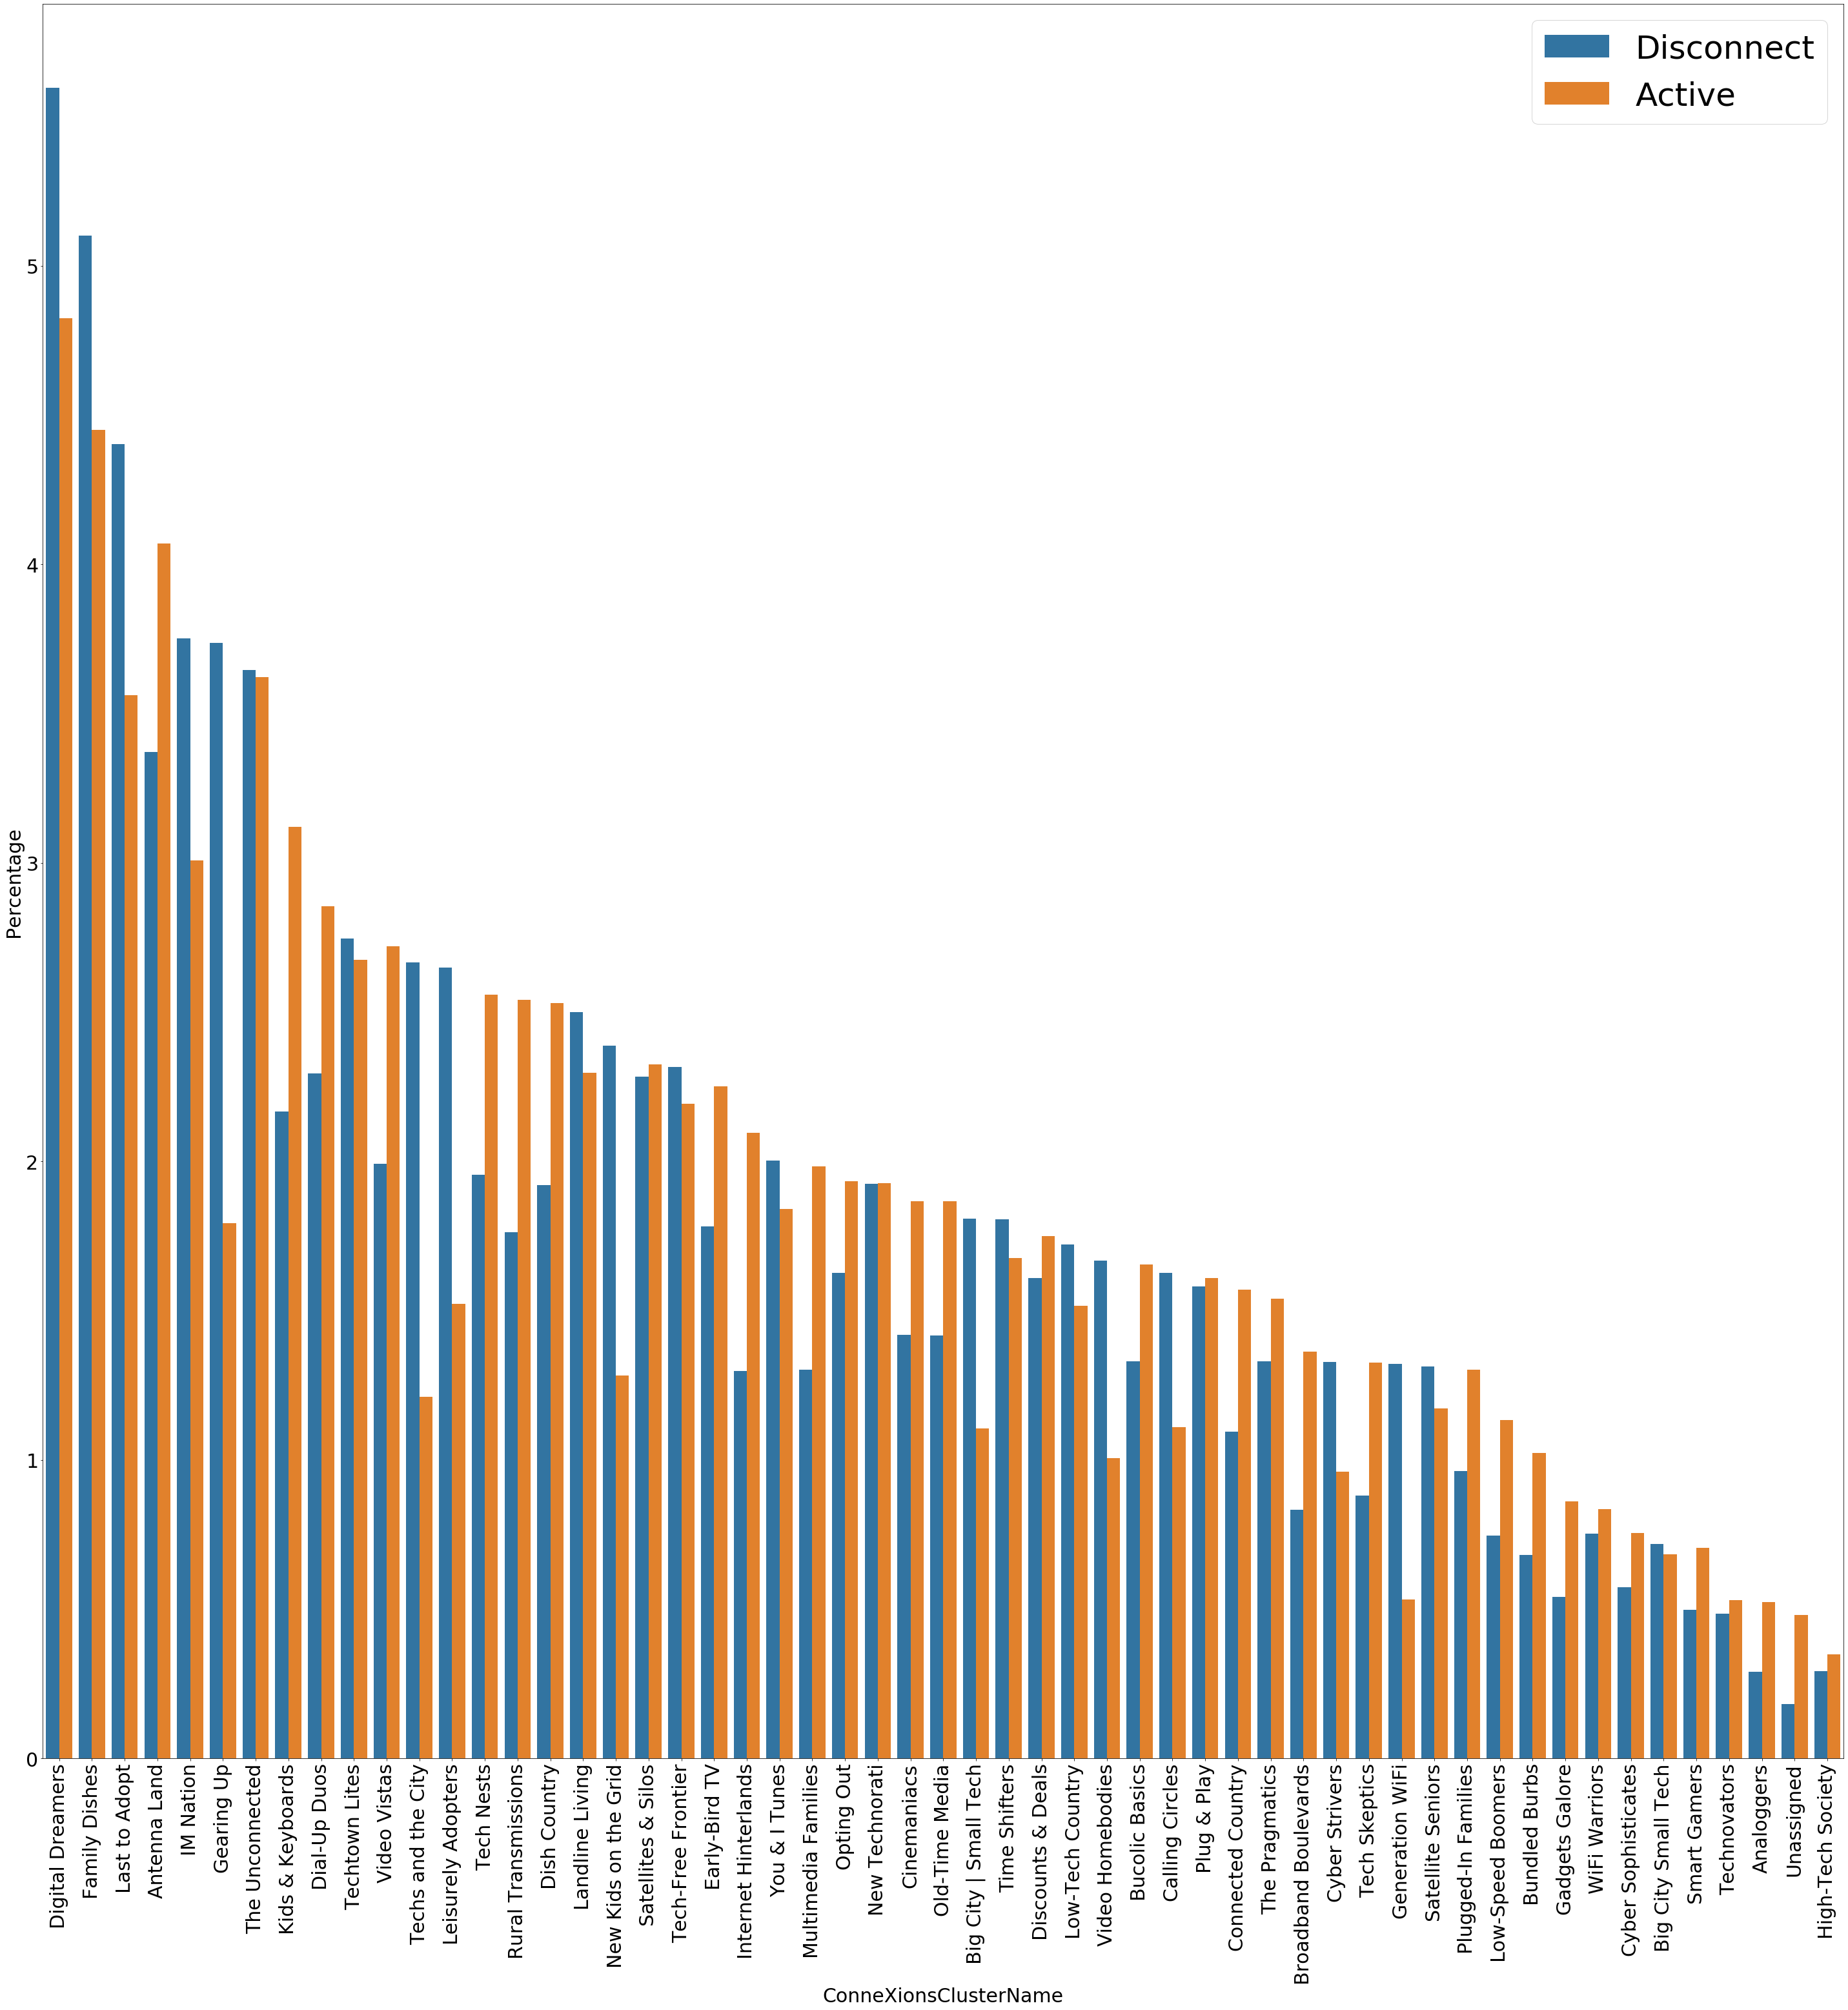

In [192]:
plt.figure(figsize=(50,50))
plt.xlabel('ConneXionsClusterName',fontsize=30)
plt.xticks(fontsize=30,rotation=90)
plt.ylabel('Relative Frequency',fontsize=30)
plt.yticks(fontsize=30)
ax = sns.barplot(x="ConneXionsClusterName", y="Percentage", hue="CustomerStatus", data=df)
plt.legend(prop={'size': 50})
plt.show()

In [193]:
df1.rename(columns={'Percentage':'Churn_Perc'},inplace=True)
df1.head()

,ConneXionsClusterName,Churn_Perc,CustomerStatus
0,Analoggers,0.289572,Disconnect
1,Antenna Land,3.370535,Disconnect
2,Big City Small Tech,0.718586,Disconnect
3,Big City | Small Tech,1.807661,Disconnect
4,Broadband Boulevards,0.832583,Disconnect


In [194]:
df2.rename(columns={'Percentage':'NonChurn_Perc'},inplace=True)
df2.head()

,ConneXionsClusterName,NonChurn_Perc,CustomerStatus
0,Analoggers,0.524354,Active
1,Antenna Land,4.069985,Active
2,Big City Small Tech,0.684870,Active
3,Big City | Small Tech,1.105780,Active
4,Broadband Boulevards,1.362607,Active


In [195]:
df_comb = df1.merge(df2,how='inner',left_on='ConneXionsClusterName',right_on='ConneXionsClusterName')

In [196]:
df_comb.drop(columns=['CustomerStatus_x','CustomerStatus_y'],inplace=True)

In [197]:
df_comb['Difference'] = df_comb['Churn_Perc']-df_comb['NonChurn_Perc']
df_comb.sort_values(by='Difference',inplace=True,ascending=False)

We can now see the problematic ConneXions Clusters identified by the increase in representation when it comes to churn customers

In [198]:
df_comb[df_comb['Difference']>0]

,ConneXionsClusterName,Churn_Perc,NonChurn_Perc,Difference
19,Gearing Up,3.737462,1.792434,1.945027
45,Techs and the City,2.667216,1.211008,1.456208
27,Leisurely Adopters,2.649404,1.523123,1.126281
31,New Kids on the Grid,2.387314,1.282349,1.104965
26,Last to Adopt,4.402612,3.561683,0.840929
20,Generation WiFi,1.322667,0.531488,0.791179
13,Digital Dreamers,5.596523,4.824413,0.772110
22,IM Nation,3.752220,3.008793,0.743427
3,Big City | Small Tech,1.807661,1.105780,0.701881
51,Video Homebodies,1.668219,1.005903,0.662315


We now anaylze ConneXionsLifestageName

Let's try to understand how ConneXions is trying to cluster the data

In [199]:
demo_1.groupby(['ConneXionsLifestageName','ConneXionsClusterName']).size()

ConneXionsLifestageName  ConneXionsClusterName
Early-Adopting Elite     Connected Country         3032
                         High-Tech Society          769
                         Plugged-In Families       2623
                         Tech Nests                5274
                         Technovators              1249
Elderly Traditionalists  Early-Bird TV             4763
                         Last to Adopt            10648
                         Tech-Free Frontier        5782
                         The Unconnected           9194
Emerging Techies         Digital Dreamers         13702
                         Gearing Up                8349
                         IM Nation                 9060
                         New Technorati            4861
                         Plug & Play               4008
                         Techs and the City        5920
Frugal Folks             Big City Small Tech       1796
                         Big City | Small Tech     4172
 

In [200]:
demo_1.columns

Index(['ConneXionsClusterName', 'ConneXionsLifestageName', 'CustomerNodeId',
       'CustomerStatus', 'CustomerType', 'Dwelling', 'FinancialSystemName',
       'FranchiseTaxArea', 'HasDepositAccount', 'LastDisconnectDate',
       'LastInstallDate', 'LifeTimeValue', 'OperatingCenterNumber',
       'OriginalInstallDate', 'OverallTenure', 'PreviousActiveDays',
       'ServiceCity', 'ServiceState', 'SubscriberwiseScore'],
      dtype='object')

We now analyze Overall Tenure.

In [201]:
churn['OverallTenure'].describe()

count    196497.000000
mean         46.568960
std          73.721076
min           0.000000
25%           8.000000
50%          20.000000
75%          50.000000
max         809.000000
Name: OverallTenure, dtype: float64

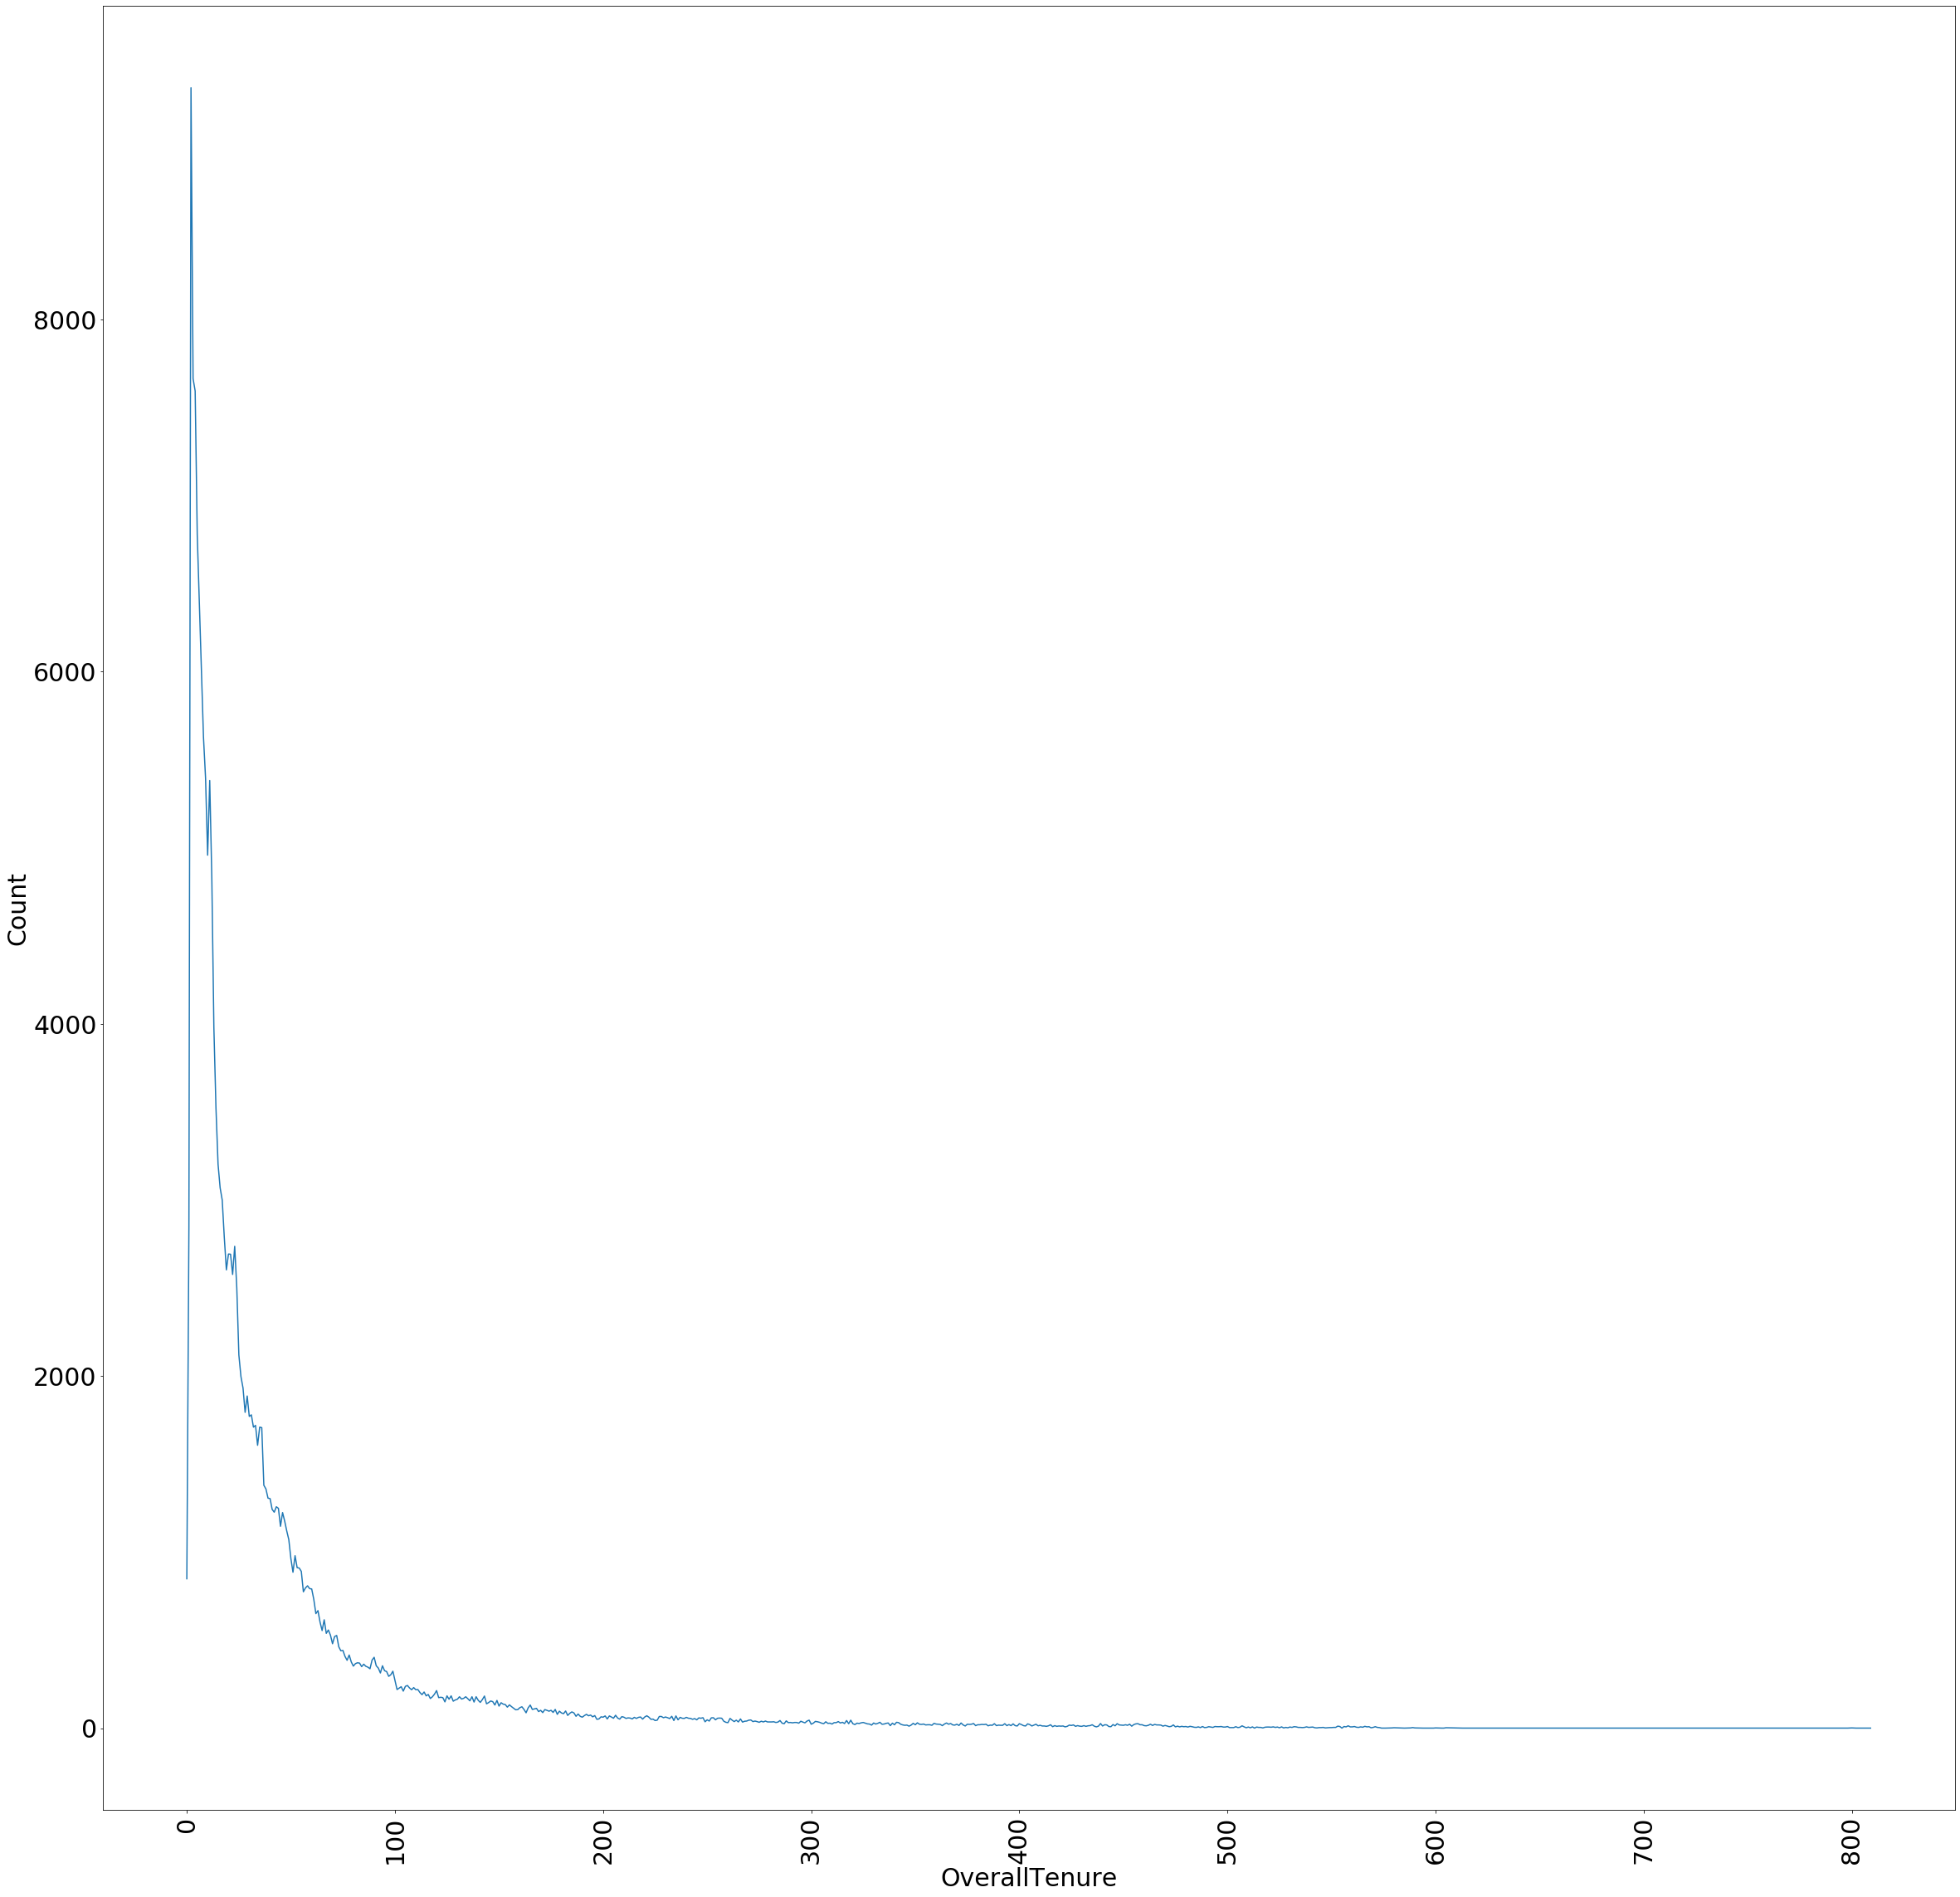

In [202]:
plt.figure(figsize=(40,40))
plt.xlabel('OverallTenure',fontsize=30)
plt.xticks(fontsize=30,rotation=90)
plt.ylabel('Count',fontsize=30)
plt.yticks(fontsize=30)
sns.lineplot(x=churn['OverallTenure'].value_counts().index,y=churn['OverallTenure'].value_counts().values)
plt.show()

We now remove outliers and try to visualize the graph where OverallTenure <150.

In [203]:
df_tenure = churn[['OverallTenure','CustomerStatus']].copy()
df_tenure.head()

,OverallTenure,CustomerStatus
0,809,Disconnect
1,808,Disconnect
2,804,Disconnect
3,802,Disconnect
5,800,Disconnect


In [204]:
df_tenure = pd.concat([df_tenure,not_churn[['OverallTenure','CustomerStatus']].copy()])

In [205]:
df_tenure[df_tenure['CustomerStatus']=='Active']['OverallTenure']

4          806
49         572
64         585
78         568
84         568
          ... 
1964889     11
3575850     10
3619886      7
2657722      6
1257310      4
Name: OverallTenure, Length: 56069, dtype: int64

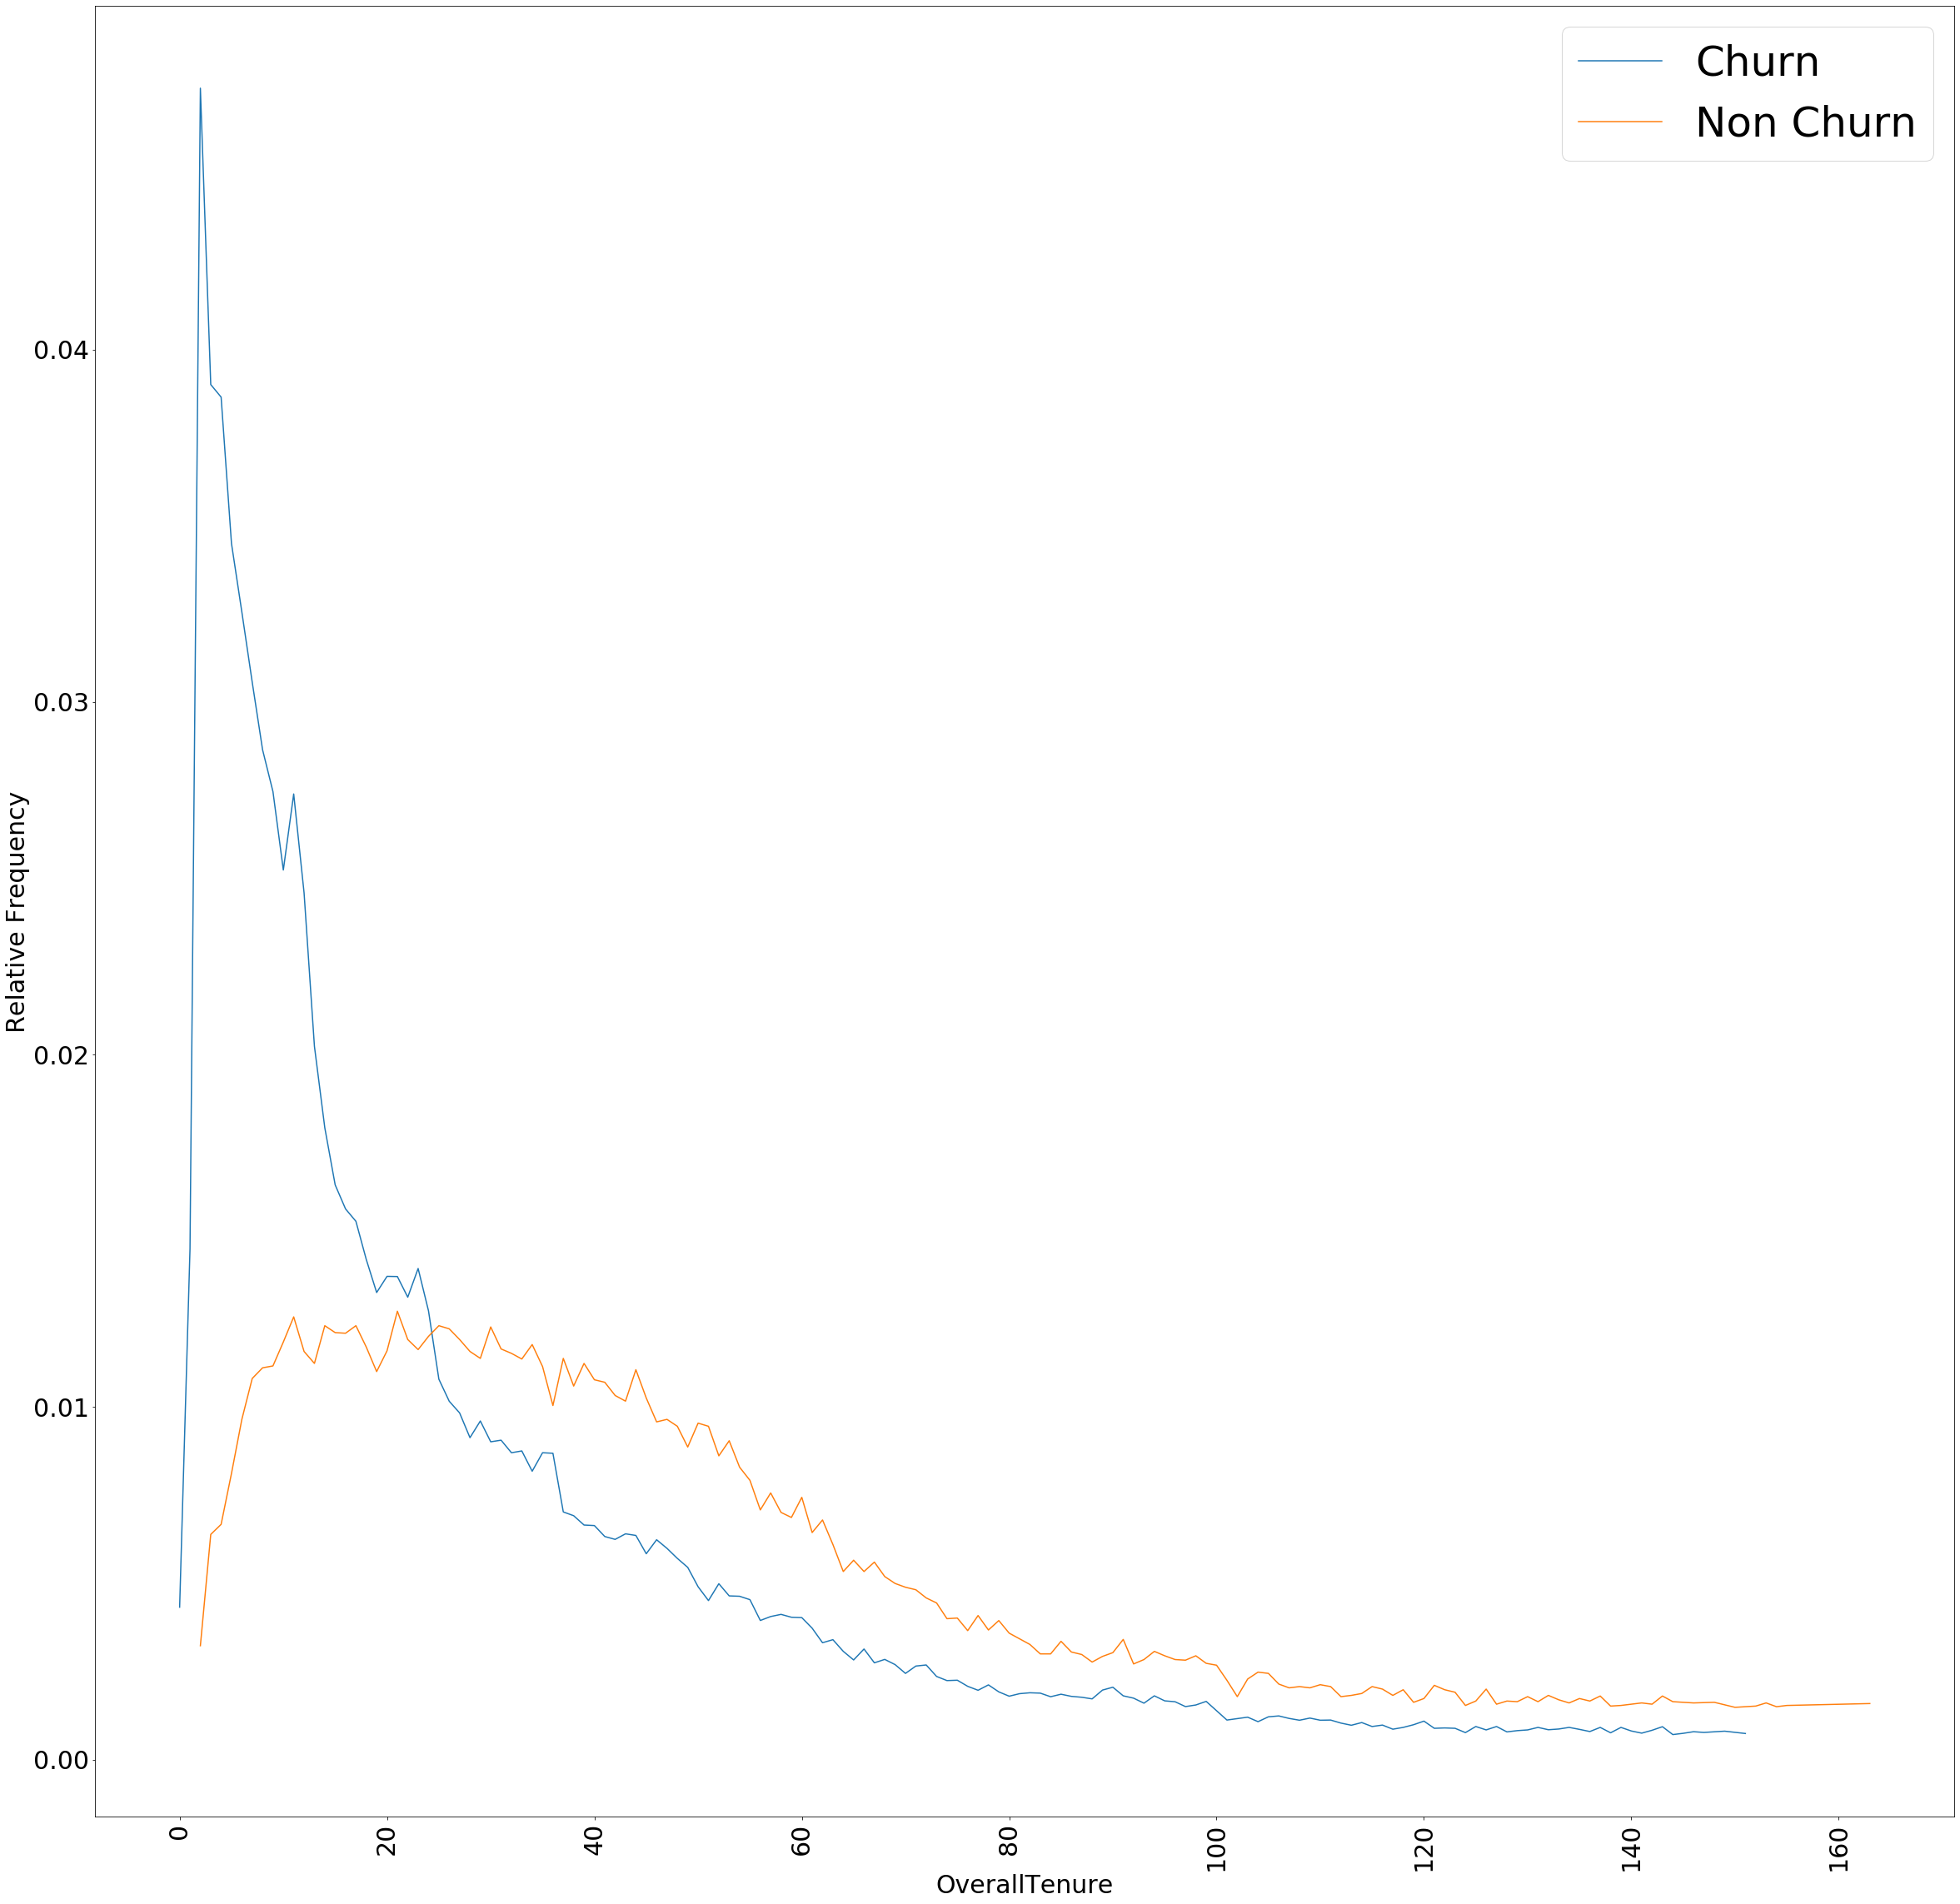

In [206]:
plt.figure(figsize=(40,40))
plt.xlabel('OverallTenure',fontsize=30)
plt.xticks(fontsize=30,rotation=90)
plt.ylabel('Relative Frequency',fontsize=30)
plt.yticks(fontsize=30)
ax1 = sns.lineplot(x=churn['OverallTenure'].value_counts(normalize=True)[:150].index,\
                   y=churn['OverallTenure'].value_counts(normalize=True)[:150].values)
ax2 = sns.lineplot(x=not_churn['OverallTenure'].value_counts(normalize=True).index[:150],\
                   y=not_churn['OverallTenure'].value_counts(normalize=True)[:150].values)
plt.legend([ax1,ax2],labels=['Churn','Non Churn'],prop={'size': 50})
plt.show()

From our analysis here, we can see that customer attrition is high amongst users who have stayed for less than 22 months with the company. As the overallTenure goes beyond this point, customer attrition rates reduce. We thus can infer that customers that leave , do so mainly in the first 20-25 months of their OverallTenure. This presents an opportunity for the company to provide tempting deals/promotions during a customer's first 2-3 years of availing the service

Another interesting point to note is that the customer attrition rate is the highest in the first few months (0-10) of their OverallTenure. This could be a result of (a)Expectations that were not delivered by the company (b)Problems during installation that forced the customer to change their mind - Poor customer service(c)Hidden charges that the customers weren't aware of (d)Competitors offering to pay off their current contract to switch over